Prueba de la base de datos china del segundo articulo del estado del arte.

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#vamos a visualizar algunas formas de onda
uno=sio.loadmat('1.mat')
dos=sio.loadmat('22.mat')
tres=sio.loadmat('3.mat')
cuatro=sio.loadmat('4.mat')
cinco=sio.loadmat('5.mat')
seis=sio.loadmat('6.mat')
siete=sio.loadmat('7.mat')
ocho=sio.loadmat('8.mat')
nueve=sio.loadmat('9.mat')

In [3]:
cargar=nueve
print(cargar.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])


In [4]:
print(cargar)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 15:37:50 2017', '__version__': '1.0', '__globals__': [], 'ECG': array([[(array(['Male'], dtype='<U4'), array([[17]], dtype=uint8), array([[-0.02395027, -0.03378999, -0.03260934, ..., -0.03275463,
                -0.03282053, -0.04170816],
               [-0.07574577, -0.1071514 , -0.09982703, ..., -0.1305844 ,
                -0.12633681, -0.13900213],
               [-0.0517955 , -0.07336141, -0.06721769, ..., -0.09782976,
                -0.09351628, -0.09729397],
               ...,
               [-0.08303111, -0.12176509, -0.11157624, ..., -0.14853974,
                -0.13845514, -0.15212412],
               [-0.05509591, -0.07989516, -0.07303201, ..., -0.13543085,
                -0.12949941, -0.14314732],
               [-0.0513044 , -0.07295473, -0.06607337, ..., -0.0831337 ,
                -0.07816703, -0.08642406]]))                                                                                

In [5]:
cargar['ECG']


array([[(array(['Male'], dtype='<U4'), array([[17]], dtype=uint8), array([[-0.02395027, -0.03378999, -0.03260934, ..., -0.03275463,
                -0.03282053, -0.04170816],
               [-0.07574577, -0.1071514 , -0.09982703, ..., -0.1305844 ,
                -0.12633681, -0.13900213],
               [-0.0517955 , -0.07336141, -0.06721769, ..., -0.09782976,
                -0.09351628, -0.09729397],
               ...,
               [-0.08303111, -0.12176509, -0.11157624, ..., -0.14853974,
                -0.13845514, -0.15212412],
               [-0.05509591, -0.07989516, -0.07303201, ..., -0.13543085,
                -0.12949941, -0.14314732],
               [-0.0513044 , -0.07295473, -0.06607337, ..., -0.0831337 ,
                -0.07816703, -0.08642406]]))                                                                                       ]],
      dtype=[('sex', 'O'), ('age', 'O'), ('data', 'O')])

In [6]:
ecg_matriz=cargar['ECG']
sexo=ecg_matriz[0,0]['sex']
edad=ecg_matriz[0,0]['age']
data=ecg_matriz[0,0]['data']

[-0.30471859 -0.43105367 -0.40159001 ... -0.52531734 -0.5082306
 -0.55917926]


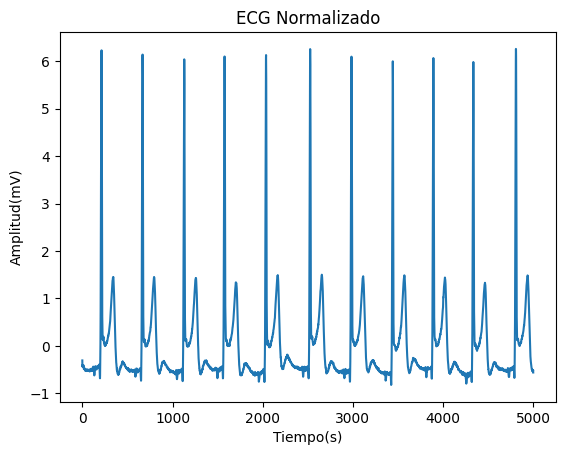

In [7]:
nsamples=int(len(data))
mv=data[1,:]
plt.title('ECG')
#plt.plot(mv)
plt.xlabel('Muestras')
plt.ylabel('Amplitud(mV)')  #amplitud!!!!
#plt.show()

#Normalizamos
mvN=(mv-np.mean(mv))/np.std(mv)
#mvN=(mv-mv.min()) / (mv.max()-mv.min())
print(mvN) 
plt.title('ECG Normalizado')
plt.plot(mvN)
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud(mV)')
plt.show()

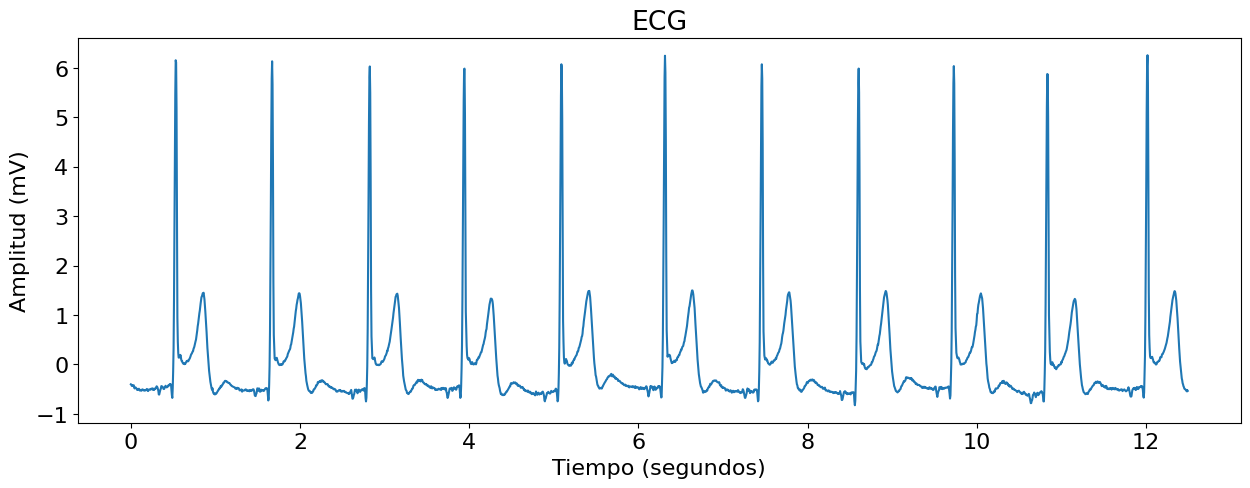

In [8]:
from scipy import signal

frecuencia_muestreo_original = 500  # Hz
frecuencia_muestreo_nueva = 200  # Hz

factor_downsampling = frecuencia_muestreo_original // frecuencia_muestreo_nueva
datos_downsampled = signal.resample(mvN, len(mvN) // factor_downsampling)
tiempo_segundos = np.arange(0, len(datos_downsampled) / frecuencia_muestreo_nueva, 1 / frecuencia_muestreo_nueva)

plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(15, 5))
plt.title('ECG')
plt.plot(tiempo_segundos, datos_downsampled)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud (mV)')
plt.savefig('/home/joshua6090/Escritorio/2')
plt.show()

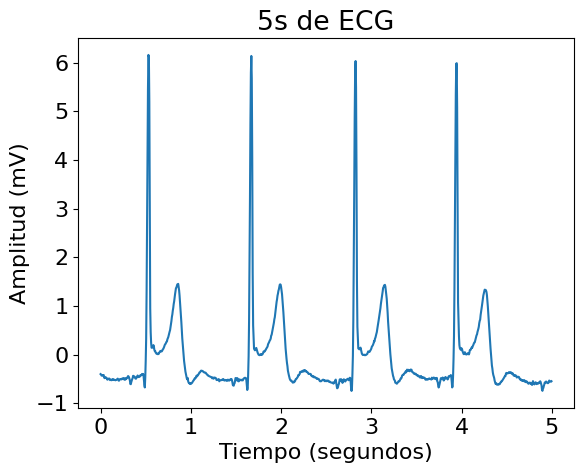

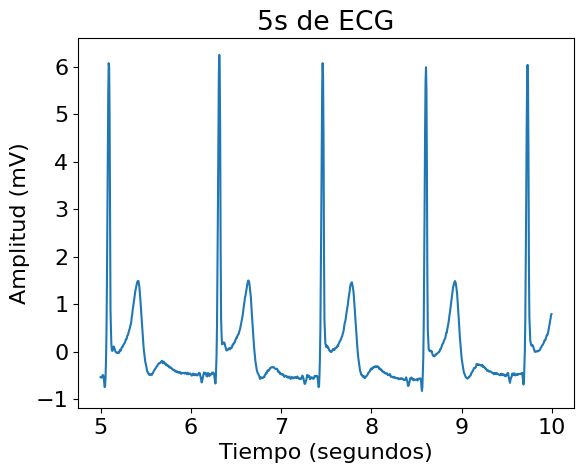

In [9]:

partir = 1000

a_partir = []
tiempo_segundos = np.arange(0, len(datos_downsampled) / frecuencia_muestreo_nueva, 1 / frecuencia_muestreo_nueva)

for x in range(0, len(datos_downsampled), partir):
    subseccion = datos_downsampled[x:x+partir]
    if len(subseccion) == partir:
        a_partir.append(subseccion)

for i in range(0, len(a_partir)):
    plt.title('5s de ECG')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud (mV)')
    
    # Crear un arreglo de tiempo en segundos para la subsección actual
    tiempo_subseccion = tiempo_segundos[i * partir:(i + 1) * partir]
    
    plt.plot(tiempo_subseccion, a_partir[i])
    plt.savefig('/home/joshua6090/Escritorio/2{}'.format(i))
    plt.show()

    

1


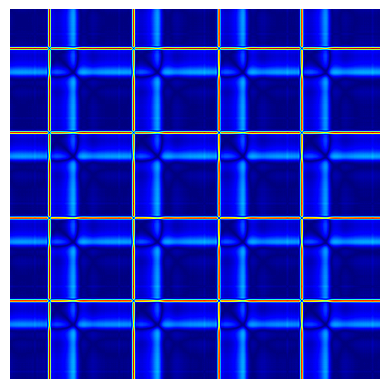

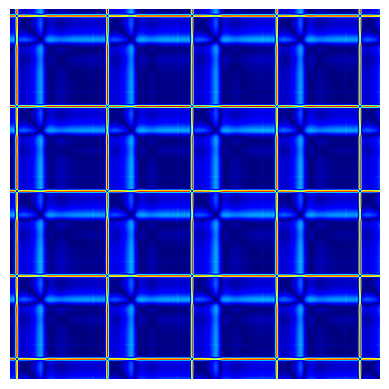

In [10]:
from skimage.io import imsave
from pyts.image import RecurrencePlot
import matplotlib.pyplot as plt
from tqdm import tqdm 
import numpy as np
import pickle
import os
import librosa.display
import librosa

eins=np.array([a_partir])
print(len(eins))

for i in range(0,len(a_partir)):
    #fig=plt.figure(figsize=[2,2])
    #plt.interactive(False)
    #ax = fig.add_subplot(111)
    #ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)
    #ax.set_frame_on(False)  
    rpcA = RecurrencePlot()
    X_rpcA= rpcA.fit_transform(eins[:,i])
    plt.imshow(X_rpcA[0]*255.0, cmap='jet')
    plt.axis('off')
    plt.savefig('/home/joshua6090/Escritorio/2RP{}'.format(i),bbox_inches='tight', pad_inches=0)
    plt.show()

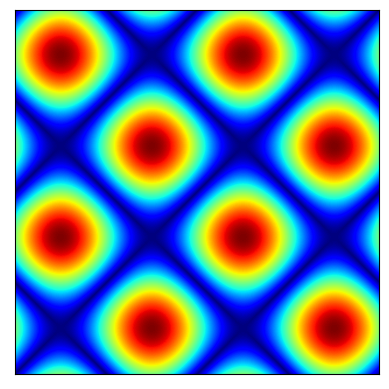

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Recurrence plot transformation
rp = RecurrencePlot()
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)




# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='jet', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

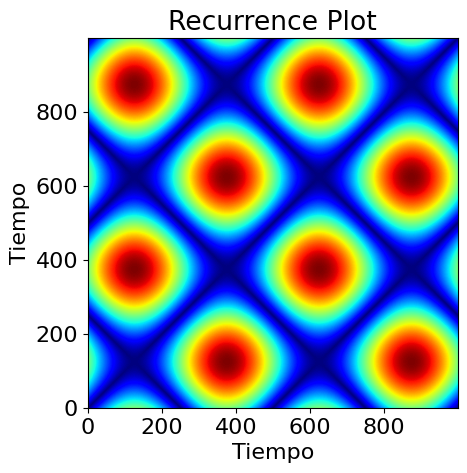

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def recurrence_plot(data):
    n = len(data)
    rp = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            rp[i, j] = np.abs(data[i] - data[j]) 

    return rp

# Generar datos de ejemplo
t = np.linspace(0, 10*np.pi, 1000)
data = x

# Crear el gráfico de recurrencia
rp = recurrence_plot(data)

# Mostrar el gráfico
plt.imshow(rp, cmap='jet', origin='lower')
plt.title('Recurrence Plot')
plt.xlabel('Tiempo')
plt.ylabel('Tiempo')
plt.show()
